### Import libraries & load data

In [54]:
# dataset
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
 
# Importing csv module
import csv
 
with open("COVID-19_Daily_Testing.csv", 'r') as x:
    data = list(csv.reader(x, delimiter=","))
 
data = np.array(data)
# display(data)

N = data.shape[0]
X = data[1:,2]
y = data[1:,3]

# # shuffle
idx = np.arange(data.shape[0])
np.random.shuffle(idx)
data = data[idx]

X = np.char.replace(X, ',', '')
y = np.char.replace(y,',', '')

# # normalize data
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X = X.astype(np.float32)
y = y.astype(np.float32)
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()
print(X.shape)
print(y.shape)

(89, 1)
(89, 1)


### Linear Regression Model - Researcher

In [55]:
### Create model
class LRR_model(object):
    def __init__(self):
        self.W = tf.Variable(-0.34)
        self.b = tf.Variable(0.04)
    
    def __call__(self, x):
        return self.W*x + self.b

In [56]:
lr = 0.003
epochs = 500
losses = []
model = LRR_model()

for epoch in range(epochs):
    with tf.GradientTape() as t:
        # feed forward
        y_hat = model(X)

        # MSE loss 
        loss = tf.reduce_mean(tf.square(y-y_hat))
        
    # debug
    losses.append(loss.numpy())

    # gradient
    dW, db = t.gradient(loss,[model.W, model.b])

    # update
    model.W.assign_sub(lr*dW)
    model.b.assign_sub(lr*db)

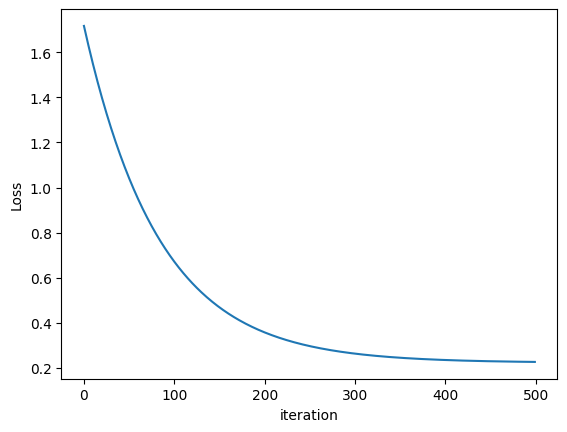

In [57]:
# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

### Linear Regression Model - Engineer

In [58]:
#creat model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=1, input_shape=[1])
])
#declare optimization method and loss fucntion
opt = tf.keras.optimizers.SGD(learning_rate=0.003)
model.compile(optimizer=opt, loss="mse")
#training
history = model.fit(X, y, batch_size=X.shape[0], epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 131ms/step - loss: 6.8104
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 6.7316
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 6.6538
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 6.5768
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 6.5008
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 6.4257
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 6.3515
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 6.2782
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 6.2057
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 6.1342
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 6.0634
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 5.9936
Epoch 13/500
1/1 [==============================] - 0s 2ms/

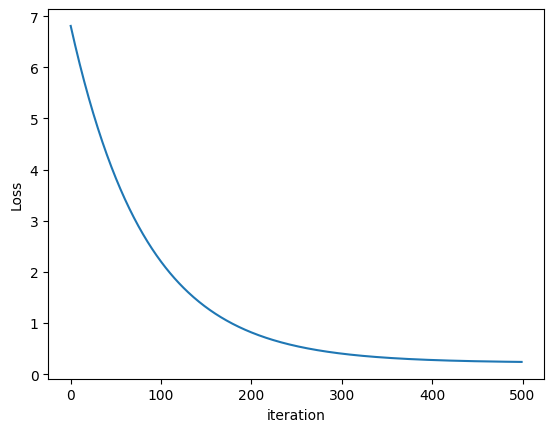

In [59]:
# plot losses
plt.plot(history.history["loss"])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()